In [1]:
# script to make heatmaps for partial correlation and NCK2 analysis

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.colors import LogNorm
import pandas, numpy
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import config
from custom_settings import *

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
FONT_SIZE = 7.0
mpl.rcParams['font.size'] = FONT_SIZE
mpl.rcParams['savefig.dpi'] = 500
%matplotlib inline


In [2]:
data_path = '../data/katjas_data/correlation_heatmaps_and_NCK2/'
figure_path = '../figures/'

In [5]:
nw_pub_expr = pandas.read_table(data_path + 'network_expr_pub_corr.txt',index_col='network')
nw_pub_expr['pub_corr'] = nw_pub_expr.apply(lambda x: numpy.NaN 
                                           if (abs(x['pub_corr']) < 0.05 or x['pub_pvalue'] > 0.01)
                                           else x['pub_corr'],
                                           axis = 1)
nw_pub_expr['expr_corr'] = nw_pub_expr.apply(lambda x: numpy.NaN 
                                           if (abs(x['expr_corr']) < 0.05 or x['expr_pvalue'] > 0.01)
                                           else x['expr_corr'],
                                           axis = 1)

In [6]:
nw_pub_expr.head()

,pub_corr,expr_corr,pub_pvalue,expr_pvalue
network,,,,
HuRI,NaN,NaN,2.666107e-02,5.713570e-01
BioPlex,0.122514,0.158464,1.010000e-35,1.690000e-44
QUBIC,0.232215,0.168505,3.760000e-66,1.770000e-32
CoFrac,0.265215,0.310756,6.100000e-55,4.460000e-74
Lit-BM,0.480853,0.200300,0.000000e+00,3.190000e-52


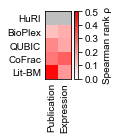

In [7]:
data = nw_pub_expr[['pub_corr','expr_corr']]
plt.figure(figsize=(1.8,2))
#cmap = plt.cm.reds
bwrBig = cm.get_cmap('bwr', 512)
newcmp = ListedColormap(bwrBig(numpy.linspace(0.5, 1, 256)))
newcmp.set_bad('grey',alpha=0.5)
plt.imshow(data,cmap=newcmp,interpolation='nearest',vmin=0,vmax=0.5)
plt.colorbar(fraction=0.046, pad=0.04, label='Spearman rank ρ')
x = plt.xticks(range(data.shape[1]),['Publication','Expression'],rotation=90)
y = plt.yticks(range(data.shape[0]),data.index.tolist())
ax = plt.gca()
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=0)
plt.tight_layout()
outfile = figure_path + 'network_pub_expr_corr'
plt.savefig(outfile + '.pdf',format='pdf')
plt.savefig(outfile + '.png',format='pdf')
plt.show()


In [8]:
gene_prop = pandas.read_table(data_path + 'gene_prop_correlations.txt',index_col='Property')
properties = gene_prop.index.tolist()
for prop in properties:
    gene_prop[prop + ' corr'] = gene_prop.apply(lambda x: numpy.NaN 
                                               if (abs(x[prop + ' corr']) < 0.05 or x[prop + ' pvalue'] > 0.01)
                                               else x[prop + ' corr'],
                                               axis = 1)
gene_prop

,Lethality corr,LoF intolerance corr,Fitness effect corr,Age corr,Publication corr,Expression corr,Lethality pvalue,LoF intolerance pvalue,Fitness effect pvalue,Age pvalue,Publication pvalue,Expression pvalue
Property,,,,,,,,,,,,
Lethality,1.000000,0.174233,0.181965,0.126158,0.292294,0.183362,0.000000e+00,1.090000e-107,5.160000e-121,3.540000e-58,0.000000e+00,2.100000e-117
LoF intolerance,0.174233,1.000000,0.134808,0.128858,0.277017,0.333019,1.090000e-107,0.000000e+00,2.720000e-67,9.840000e-63,1.030000e-295,0.000000e+00
Fitness effect,0.181965,0.134808,1.000000,0.231834,0.133892,0.228956,5.160000e-121,2.720000e-67,0.000000e+00,2.340000e-201,2.020000e-70,3.200000e-194
Age,0.126158,0.128858,0.231834,1.000000,0.316923,0.382398,3.540000e-58,9.840000e-63,2.340000e-201,0.000000e+00,0.000000e+00,0.000000e+00
Publication,0.292294,0.277017,0.133892,0.316923,1.000000,0.382651,0.000000e+00,1.030000e-295,2.020000e-70,0.000000e+00,0.000000e+00,0.000000e+00
Expression,0.183362,0.333019,0.228956,0.382398,0.382651,1.000000,2.100000e-117,0.000000e+00,3.200000e-194,0.000000e+00,0.000000e+00,0.000000e+00


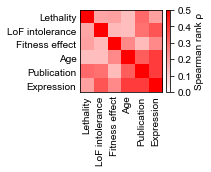

In [9]:
data = gene_prop[['Lethality corr','LoF intolerance corr','Fitness effect corr', 'Age corr','Publication corr','Expression corr']]
plt.figure(figsize=(3,2.5))
#cmap = plt.cm.reds
bwrBig = cm.get_cmap('bwr', 512)
newcmp = ListedColormap(bwrBig(numpy.linspace(0.5, 1, 256)))
newcmp.set_bad('grey',alpha=0.5)
plt.imshow(data,cmap=newcmp,interpolation='nearest',vmin=0,vmax=0.5)
plt.colorbar(fraction=0.046, pad=0.04, label='Spearman rank ρ')
x = plt.xticks(range(data.shape[1]),data.index.tolist(),rotation=90)
y = plt.yticks(range(data.shape[0]),data.index.tolist())
ax = plt.gca()
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=0)
plt.tight_layout()
outfile = figure_path + 'gene_prop_correlations'
plt.savefig(outfile + '.pdf',format='pdf')
plt.savefig(outfile + '.png',format='pdf')
plt.show()


In [10]:
nw_prop = pandas.read_table(data_path + 'nw_gene_prop_corr_raw.txt',index_col='network')
for prop in properties[:-2]:
    nw_prop[prop + ' corr'] = nw_prop.apply(lambda x: numpy.NaN 
                                               if (abs(x[prop + ' corr']) < 0.05 or x[prop + ' pvalue'] > 0.01)
                                               else x[prop + ' corr'],
                                               axis = 1)
nw_prop

,Lethality corr,LoF intolerance corr,Fitness effect corr,Age corr,Lethality pvalue,LoF intolerance pvalue,Fitness effect pvalue,Age pvalue
network,,,,,,,,
HuRI,NaN,NaN,NaN,-0.080517,1.780174e-01,2.301602e-02,4.081217e-01,1.200000e-12
BioPlex,0.054379,0.057705,0.108724,0.068403,6.160000e-08,7.230000e-09,1.740000e-27,5.340000e-12
QUBIC,0.099266,0.121359,0.136606,0.058166,6.380000e-13,1.710000e-18,1.140000e-22,2.510000e-05
CoFrac,NaN,0.144912,0.297637,0.246190,1.044647e-01,4.150000e-17,1.610000e-67,1.300000e-47
Lit-BM,0.207316,0.210527,0.090787,0.078435,6.510000e-57,1.420000e-58,5.930000e-12,1.970000e-09


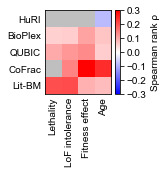

In [11]:
data = nw_prop[['Lethality corr','LoF intolerance corr','Fitness effect corr', 'Age corr']]
plt.figure(figsize=(2.5,2.5))
#cmap = plt.cm.reds
newcmp = cm.get_cmap('bwr', 512)
newcmp.set_bad('grey',alpha=0.5)
plt.imshow(data,cmap=newcmp,interpolation='nearest',vmin=-0.3,vmax=0.3)
plt.colorbar(fraction=0.046, pad=0.04, label='Spearman rank ρ')
x = plt.xticks(range(data.shape[1]),properties[:-2],rotation=90)
y = plt.yticks(range(data.shape[0]),data.index.tolist())
ax = plt.gca()
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=0)
plt.tight_layout()
outfile = figure_path + 'nw_gene_prop_corr_raw'
plt.savefig(outfile + '.pdf',format='pdf')
plt.savefig(outfile + '.png',format='pdf')
plt.show()


In [12]:
nw_prop_corr = pandas.read_table(data_path + 'nw_gene_prop_corr_corrected.txt',index_col='network')
for prop in properties[:-2]:
    nw_prop_corr[prop + ' corr'] = nw_prop_corr.apply(lambda x: numpy.NaN 
                                               if (abs(x[prop + ' corr']) < 0.05 or x[prop + ' pvalue'] > 0.01)
                                               else x[prop + ' corr'],
                                               axis = 1)
nw_prop_corr

,Lethality corr,LoF intolerance corr,Fitness effect corr,Age corr,Lethality pvalue,LoF intolerance pvalue,Fitness effect pvalue,Age pvalue
network,,,,,,,,
HuRI,NaN,NaN,NaN,-0.080517,1.780174e-01,2.301602e-02,4.081217e-01,1.200000e-12
BioPlex,NaN,NaN,0.059738,NaN,4.370000e-03,3.880000e-01,3.310000e-07,7.680000e-01
QUBIC,0.093483,0.108158,0.089265,NaN,1.210000e-10,1.150000e-13,1.310000e-09,2.320000e-01
CoFrac,NaN,NaN,0.272979,0.264067,3.608992e-01,2.810000e-02,3.800000e-56,2.040000e-52
Lit-BM,0.086920,0.122563,0.081411,NaN,3.980000e-11,3.410000e-20,1.160000e-09,2.840000e-02


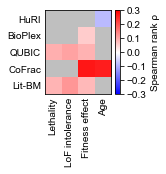

In [13]:
data = nw_prop_corr[['Lethality corr','LoF intolerance corr','Fitness effect corr', 'Age corr']]
plt.figure(figsize=(2.5,2.5))
#cmap = plt.cm.reds
newcmp = cm.get_cmap('bwr', 512)
newcmp.set_bad('grey',alpha=0.5)
plt.imshow(data,cmap=newcmp,interpolation='nearest',vmin=-0.3,vmax=0.3)
plt.colorbar(fraction=0.046, pad=0.04, label='Spearman rank ρ')
x = plt.xticks(range(data.shape[1]),properties[:-2],rotation=90)
y = plt.yticks(range(data.shape[0]),data.index.tolist())
ax = plt.gca()
ax.tick_params(axis='x',length=0)
ax.tick_params(axis='y',length=0)
plt.tight_layout()
outfile = figure_path + 'nw_gene_prop_corr_corrected'
plt.savefig(outfile + '.pdf',format='pdf')
plt.savefig(outfile + '.png',format='pdf')
plt.show()
